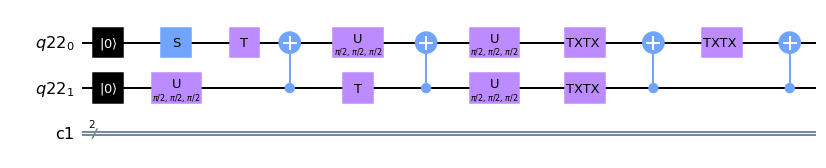

In [9]:
%matplotlib inline

from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info.operators import Operator
import math 
import numpy as np

q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)

# R E S E T
qc.reset(0)
qc.reset(1)


# F O R W A R D  E V O L U T I O N
qc.s(0)
qc.u((np.pi/2), (np.pi/2), (np.pi/2), 1)
qc.t(0)
qc.cx(1, 0)
qc.u((np.pi/2), (np.pi/2), (np.pi/2), 0)
qc.t(1)
qc.cx(1, 0)
qc.u((np.pi/2), (np.pi/2), (np.pi/2), 0)
qc.u((np.pi/2), (np.pi/2), (np.pi/2), 1)


#T I M E  R E V E R S A L 
e = ((math.e ** (math.pi * 1j))**2)
f = (math.e ** (math.pi * 1j))
txtx = Operator([
    [e, 0],
    [0, f]
])

qc.unitary(txtx, [0, 1], label='TXTX ')
qc.cx(1, 0)
qc.unitary(txtx, [0], label='TXTX ')
qc.cx(1, 0)


# e x e c u t i o n 
qc.measure([0], [0])
qc.measure([1], [1])
qc.draw()

{'00': 161, '10': 839}


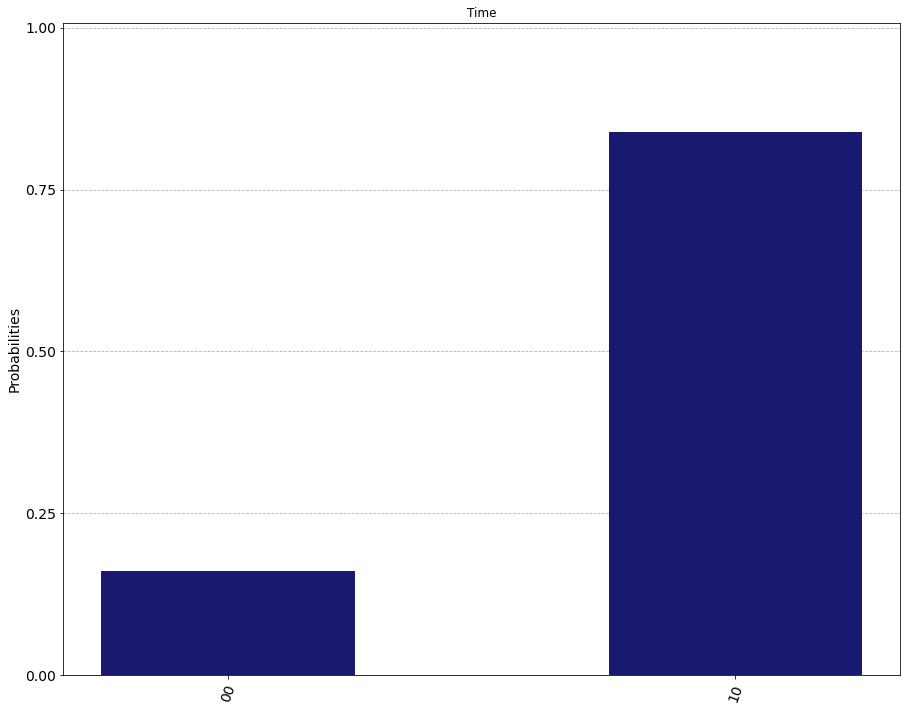

In [10]:
simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000)
result = job.result()

counts  = result.get_counts(qc)
print(counts)

plot_histogram(counts, figsize= (15,12),
               color=['midnightblue'], title= "Time", bar_labels= False)